## Prétraitement du dataset

### Importer les bibliothèques utiles

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_style("darkgrid")

### Lire les données

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/inrae/icos/D_meteo_fluxes_FR-Bil_2015_2022.csv')
df1.head()

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,RECO,P
0,1,2015,1,FR-Bil,2015-01-01 13:15:00,2.129500,236.455278,3.646765,2.606778,-2.056866,1.554918,0.000
1,2,2015,2,FR-Bil,2015-01-02 13:15:00,4.807500,181.507111,4.409038,2.355167,-2.559287,1.825543,0.000
2,3,2015,3,FR-Bil,2015-01-03 13:30:00,11.026647,81.873765,4.439173,1.910706,-1.959193,2.486712,1.241
3,4,2015,4,FR-Bil,2015-01-04 13:30:00,12.877941,94.259353,6.243830,2.051529,-3.564290,2.699011,1.964
4,5,2015,5,FR-Bil,2015-01-05 13:15:00,6.067889,169.532833,7.797282,0.669667,-5.804766,1.969068,0.000


In [ ]:
df1.columns

Index(['Unnamed: 0', 'Year', 'DoY', 'station.name', 'DateTime', 'Tair', 'Rg',
       'GPP', 'VPD', 'NEE_F', 'RECO', 'P'],
      dtype='object')

In [ ]:
df1.info() # 2922 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2922 non-null   int64  
 1   Year          2922 non-null   int64  
 2   DoY           2922 non-null   int64  
 3   station.name  2922 non-null   object 
 4   DateTime      2922 non-null   object 
 5   Tair          2922 non-null   float64
 6   Rg            2922 non-null   float64
 7   GPP           2922 non-null   float64
 8   VPD           2922 non-null   float64
 9   NEE_F         2922 non-null   float64
 10  RECO          2922 non-null   float64
 11  P             2922 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 274.1+ KB


In [ ]:
df1.isna().sum() # c ok

Unnamed: 0      0
Year            0
DoY             0
station.name    0
DateTime        0
Tair            0
Rg              0
GPP             0
VPD             0
NEE_F           0
RECO            0
P               0
dtype: int64

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/inrae/icos/D_SWC_FR-Bil_2015_2022.csv')
df2.head()

,Unnamed: 0,Year,DoY,DateTime,SMSSO4_10cm_3491_Avg,SMSSO4_10cm_5502_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_22cm_5504_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_60cm_3497_Avg,SMSSO4_85cm_5508_Avg
0,1,2015,1,2015-01-01 11:45:00,0.086700,0.096835,0.163156,0.099029,0.061558,0.057044,0.047104,0.069011
1,2,2015,2,2015-01-02 11:45:00,0.084119,0.093920,0.160910,0.096300,0.059802,0.055472,0.046544,0.068502
2,3,2015,3,2015-01-03 11:45:00,0.082899,0.092817,0.159007,0.093783,0.058179,0.053987,0.045941,0.067753
3,4,2015,4,2015-01-04 11:45:00,0.086224,0.095856,0.159345,0.093113,0.056857,0.052661,0.045341,0.066953
4,5,2015,5,2015-01-05 11:45:00,0.086753,0.096755,0.160409,0.094375,0.056400,0.051847,0.044950,0.066715


In [ ]:
df2.columns

Index(['Unnamed: 0', 'Year', 'DoY', 'DateTime', 'SMSSO4_10cm_3491_Avg',
       'SMSSO4_10cm_5502_Avg', 'SMSSO4_22cm_4663_Avg', 'SMSSO4_22cm_5504_Avg',
       'SMSSO4_40cm_4925_Avg', 'SMSSO4_60cm_3176_Avg', 'SMSSO4_60cm_3497_Avg',
       'SMSSO4_85cm_5508_Avg'],
      dtype='object')

In [ ]:
df2.isna().sum()

Unnamed: 0                0
Year                      0
DoY                       0
DateTime                  0
SMSSO4_10cm_3491_Avg      4
SMSSO4_10cm_5502_Avg      4
SMSSO4_22cm_4663_Avg      4
SMSSO4_22cm_5504_Avg      4
SMSSO4_40cm_4925_Avg      4
SMSSO4_60cm_3176_Avg      4
SMSSO4_60cm_3497_Avg    601
SMSSO4_85cm_5508_Avg      4
dtype: int64

In [ ]:
cols = ['SMSSO4_10cm_5502_Avg', 'SMSSO4_22cm_5504_Avg', 'SMSSO4_60cm_3497_Avg']
df2.drop(cols, axis=1, inplace=True) # on garde une seule colonne pour chaque profondeur

In [ ]:
df2.columns

Index(['Unnamed: 0', 'Year', 'DoY', 'DateTime', 'SMSSO4_10cm_3491_Avg',
       'SMSSO4_22cm_4663_Avg', 'SMSSO4_40cm_4925_Avg', 'SMSSO4_60cm_3176_Avg',
       'SMSSO4_85cm_5508_Avg'],
      dtype='object')

In [ ]:
df2.isna().sum()

Unnamed: 0              0
Year                    0
DoY                     0
DateTime                0
SMSSO4_10cm_3491_Avg    4
SMSSO4_22cm_4663_Avg    4
SMSSO4_40cm_4925_Avg    4
SMSSO4_60cm_3176_Avg    4
SMSSO4_85cm_5508_Avg    4
dtype: int64

In [ ]:
df2 = df2.interpolate()  # remplir les 4 valeurs manquantes par interp linéaire

In [ ]:
df2.isna().sum()

Unnamed: 0              0
Year                    0
DoY                     0
DateTime                0
SMSSO4_10cm_3491_Avg    0
SMSSO4_22cm_4663_Avg    0
SMSSO4_40cm_4925_Avg    0
SMSSO4_60cm_3176_Avg    0
SMSSO4_85cm_5508_Avg    0
dtype: int64

In [ ]:
# changer format date : ann-mois-jour
# unifier la forme pour faire le merge
df1['DateTime'] = pd.to_datetime(df1['DateTime'])
df1['DateTime'] = df1['DateTime'].dt.strftime('%Y-%m-%d')

# idem
df2['DateTime'] = pd.to_datetime(df2['DateTime'])
df2['DateTime'] = df2['DateTime'].dt.strftime('%Y-%m-%d')

In [ ]:
df = pd.merge(df1, df2, on=['Unnamed: 0', 'Year', 'DoY', 'DateTime'])
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [ ]:
df[df['station.name']!='FR-Bil'] # on travaille sur 1 seul site

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,RECO,P,SMSSO4_10cm_3491_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg


In [ ]:
max_date = df['DateTime'].max()
min_date = df['DateTime'].min()
duration = max_date - min_date
duration

Timedelta('2921 days 00:00:00')

In [ ]:
duration.days//365 # 8 years

8

In [ ]:
first_date = df.iloc[0].DateTime
print(f"de : {first_date.strftime('%Y-%m-%d')}")
last_date = df.iloc[-1].DateTime
print(f"à : {last_date.strftime('%Y-%m-%d')}")

de : 2015-01-01
à : 2022-12-31


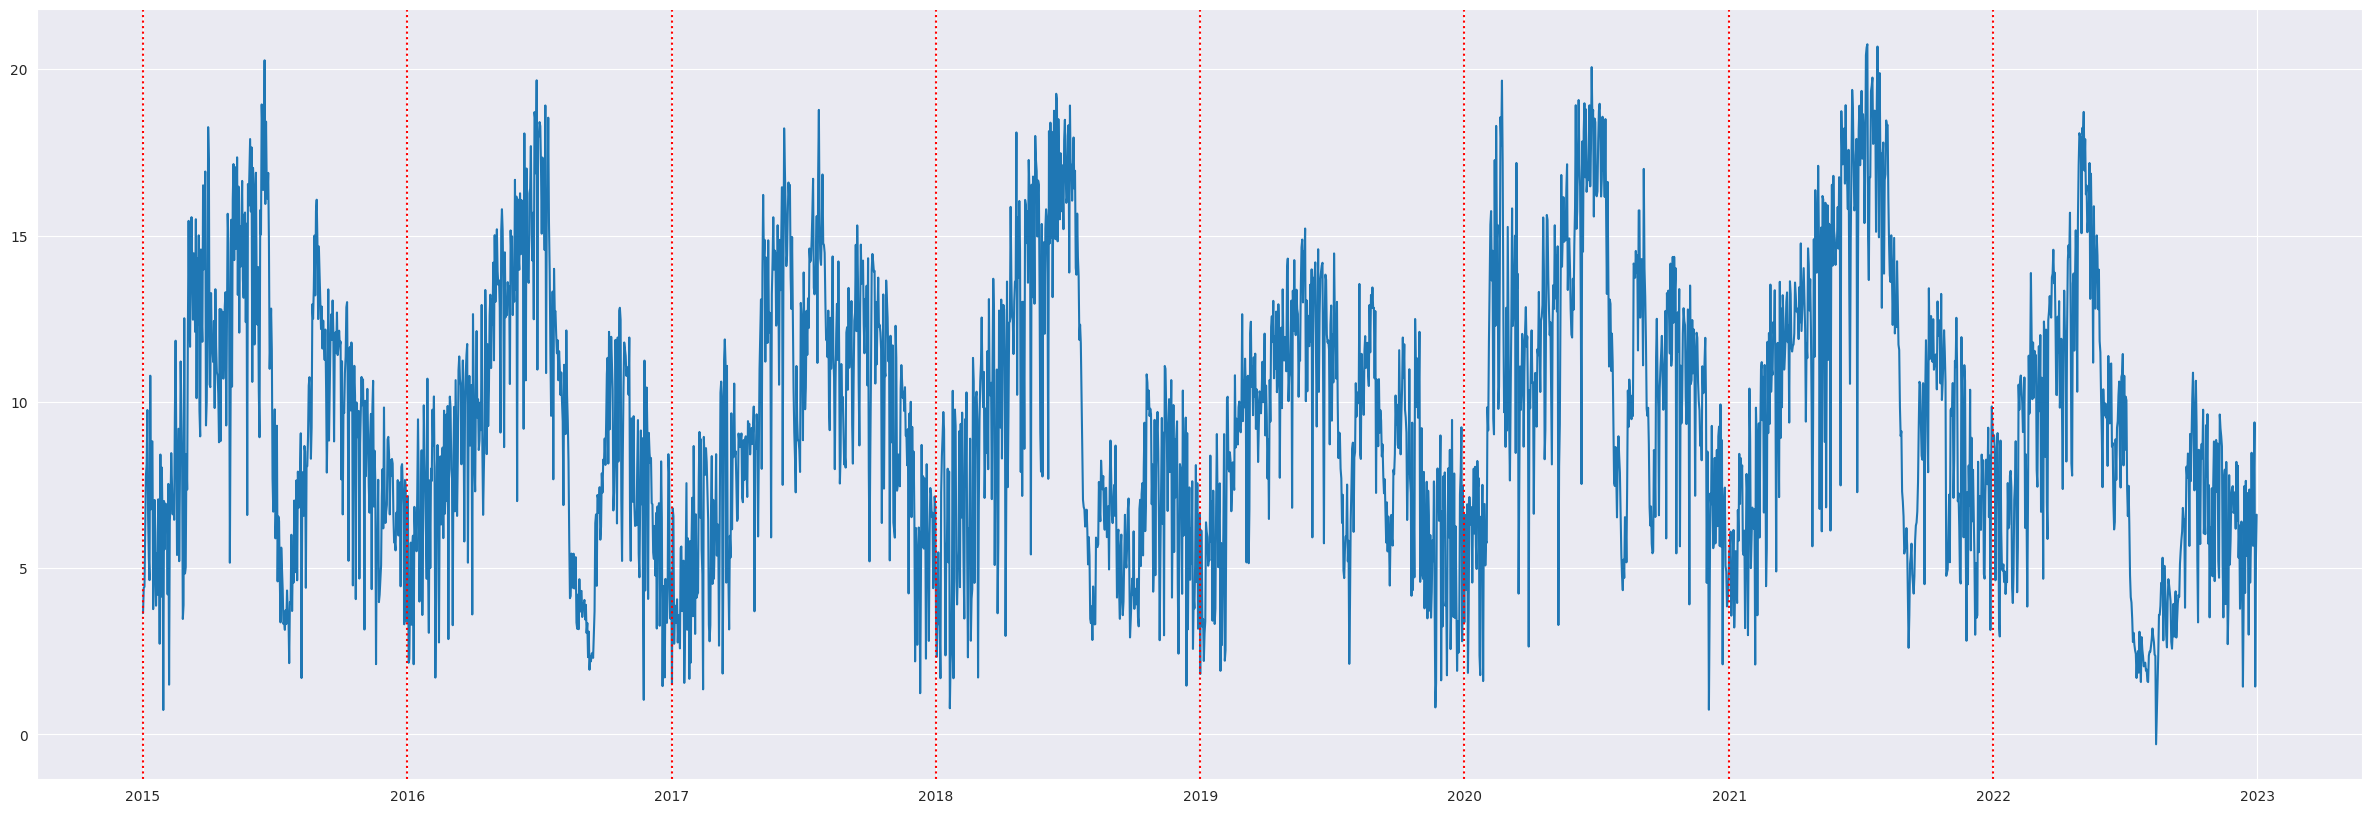

In [ ]:
plt.figure(figsize=(30, 10))
plt.plot(df['DateTime'],df['GPP'])

unique_years = df['DateTime'].dt.year.unique()
#print(unique_years)

for year in unique_years:
    plt.axvline(pd.to_datetime(f"{year}-01-01"), color='red', linestyle='dotted')

plt.show()

### Extraire les composantes (annuelles et cycliques) à partir du GPP

$$X_t =
\overline{X}^{365d}_t +
\overline{X_t - \bar{X}^{365d}_t} +
\tilde{X_t}$$

avec :
$$\overline{X}^{T} = \frac{1}{N} \sum_{k=1}^{N} X_{t+kT}$$

In [ ]:
########################   Calcul de la composante annuelle   ############################################################

"""
Le calcul est fait de manière cyclique.. en effet, si les données pour t+1 an et t+2 ans ne sont pas disponibles,
les valeurs sont complétées par les données du début
Cela permet de traiter les cas où les deux dernières années n'ont pas suffisamment de données disponibles...
"""

T = 365
N = 2    # nombre d'années

for index, row in df.iterrows():
    t = index  # indice de l'observation courante
    partial_sum = 0.0
    count = 0

    # calculer la somme des observations des deux années suivantes
    for i in range(N):
        observation_index = (t+(i+1)*T) % len(df)  # indice de l'observation après i+1 années, modulo pour éviter les erreurs d'index hors limite
        partial_sum += df.iloc[observation_index]['GPP']  # récupérer gpp correspodant à l'indice
        count+=1

    # calculer la moyenne de la composante annuelle
    if count == 2:
        df.at[index, 'GPP_ann'] = partial_sum/count
    else:
      print('count !=2 !!!!')

In [ ]:
# quick check
print((df.iloc[-365]['GPP']+df.iloc[0]['GPP'])/2)
print(df.iloc[-365*2]['GPP_ann'])

6.2465702499999995
6.2465702499999995


In [ ]:
print((df.iloc[-200]['GPP']+df.iloc[165]['GPP'])/2)
print(df.iloc[-565]['GPP_ann']) # c ok pour les deux

13.40112460430109
13.40112460430109


In [ ]:
# ########################   Calcul de la composante du cycle jour et nuit   ############################################################

# from datetime import timedelta


# # idem pr calculer la composante qui décrit les cycles, on choisit N=7
# # on commence par calculer ce qui reste de la moyenne annuelle
# df['GPP_t - GPP_ann'] = df['GPP'] - df['GPP_ann']

# T=1
# interval_T = timedelta(days=T)

# # calcul de X_t pr chaque t
# for idx, row in df.iterrows():
#     date_t = row['DateTime']
#     s=0
#     for i in range(1,8):
#       date_t_plus_iT = date_t + i*interval_T

#       # recherche des observ corresp pour t+T jusqu'à t+7T
#       X_t_plus_iT = df[df['DateTime'] == date_t_plus_iT]['GPP_t - GPP_ann'].values

#       if len(X_t_plus_iT) > 0:
#         s += X_t_plus_iT

#     # calculer la moyenne finale
#     df.loc[idx, 'GPP_cycle'] = s/7

# # enlever les 7 dernières valeurs (pour lesquelles on ne peut pas calculer cette moyenne)
# df.drop(df.tail(7).index, inplace=True)

In [ ]:
df['GPP_anomalies'] = df['GPP'] - df['GPP_ann'] #- df['GPP_cycle'] # soustraire les composantes du GPP initial
df

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,RECO,P,SMSSO4_10cm_3491_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg,GPP_ann,GPP_anomalies
0,1,2015,1,FR-Bil,2015-01-01,2.129500,236.455278,3.646765,2.606778,-2.056866,1.554918,0.000,0.086700,0.163156,0.061558,0.057044,0.069011,5.827338,-2.180573
1,2,2015,2,FR-Bil,2015-01-02,4.807500,181.507111,4.409038,2.355167,-2.559287,1.825543,0.000,0.084119,0.160910,0.059802,0.055472,0.068502,4.338556,0.070482
2,3,2015,3,FR-Bil,2015-01-03,11.026647,81.873765,4.439173,1.910706,-1.959193,2.486712,1.241,0.082899,0.159007,0.058179,0.053987,0.067753,4.478166,-0.038993
3,4,2015,4,FR-Bil,2015-01-04,12.877941,94.259353,6.243830,2.051529,-3.564290,2.699011,1.964,0.086224,0.159345,0.056857,0.052661,0.066953,4.415250,1.828580
4,5,2015,5,FR-Bil,2015-01-05,6.067889,169.532833,7.797282,0.669667,-5.804766,1.969068,0.000,0.086753,0.160409,0.056400,0.051847,0.066715,3.341185,4.456097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2918,2022,361,FR-Bil,2022-12-27,12.370000,190.304444,7.606389,1.999333,-4.944338,2.625636,0.100,0.075544,0.144837,0.052613,0.044469,0.061269,5.490239,2.116151
2918,2919,2022,362,FR-Bil,2022-12-28,13.084706,225.631176,9.381777,4.543176,-6.725318,2.617632,0.000,0.074046,0.143549,0.051709,0.043759,0.060927,5.869125,3.512652
2919,2920,2022,363,FR-Bil,2022-12-29,11.620000,31.114118,1.440885,0.323353,1.062166,2.460614,15.800,0.091326,0.149425,0.051049,0.043188,0.060470,7.746160,-6.305275
2920,2921,2022,364,FR-Bil,2022-12-30,15.400000,114.915882,5.250922,3.485353,-2.669409,2.512887,2.500,0.112975,0.170768,0.061112,0.045150,0.062779,5.943021,-0.692098


In [ ]:
# sanity check
for i, row in df.iterrows():
  #if round(row['GPP_ann']+row['GPP_cycle']+row['GPP_anomalies'],3) != round(row['GPP'],3):
  if round(row['GPP_ann']+row['GPP_anomalies'],3) != round(row['GPP'],3):
    print('erreur décomposition !!')
print('décomposition ok')

décomposition ok


### Configurer le temps

In [ ]:
df['Time (s)'] = df['DateTime'].apply(lambda x: x.timestamp())  # convertir t en secondes
df['Time (s)'] = df['Time (s)'] - df['Time (s)'][0]  # commencer de 0

In [ ]:
# on a privilégié une forme sinusoïdale pour le temps (entrée utile pour le modèle, celui-ci saura se situer dans le temps)

d = 24*3600
# df['cos day'] = np.cos(df['Time (s)']*(2*np.pi/d))
# df['sin day'] = np.sin(df['Time (s)']*(2*np.pi/d))

y = 365*d
df['cos year'] = np.cos(df['Time (s)']*(2*np.pi/y))
df['sin year'] = np.sin(df['Time (s)']*(2*np.pi/y))

df.head()

,Unnamed: 0,Year,DoY,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,...,SMSSO4_10cm_3491_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg,GPP_ann,GPP_anomalies,Time (s),cos year,sin year
0,1,2015,1,FR-Bil,2015-01-01,2.129500,236.455278,3.646765,2.606778,-2.056866,...,0.086700,0.163156,0.061558,0.057044,0.069011,5.827338,-2.180573,0.0,1.000000,0.000000
1,2,2015,2,FR-Bil,2015-01-02,4.807500,181.507111,4.409038,2.355167,-2.559287,...,0.084119,0.160910,0.059802,0.055472,0.068502,4.338556,0.070482,86400.0,0.999852,0.017213
2,3,2015,3,FR-Bil,2015-01-03,11.026647,81.873765,4.439173,1.910706,-1.959193,...,0.082899,0.159007,0.058179,0.053987,0.067753,4.478166,-0.038993,172800.0,0.999407,0.034422
3,4,2015,4,FR-Bil,2015-01-04,12.877941,94.259353,6.243830,2.051529,-3.564290,...,0.086224,0.159345,0.056857,0.052661,0.066953,4.415250,1.828580,259200.0,0.998667,0.051620
4,5,2015,5,FR-Bil,2015-01-05,6.067889,169.532833,7.797282,0.669667,-5.804766,...,0.086753,0.160409,0.056400,0.051847,0.066715,3.341185,4.456097,345600.0,0.997630,0.068802


In [ ]:
# renommer colonne Day
df = df.rename(columns={'DoY': 'Day'})

# supprimer les colonnes dont on va plus s'en servir
#cols_to_drop = ['GPP_t - GPP_ann','Time (s)']
df.drop('Time (s)', axis=1, inplace=True)

In [ ]:
df

,Unnamed: 0,Year,Day,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,...,P,SMSSO4_10cm_3491_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg,GPP_ann,GPP_anomalies,cos year,sin year
0,1,2015,1,FR-Bil,2015-01-01,2.129500,236.455278,3.646765,2.606778,-2.056866,...,0.000,0.086700,0.163156,0.061558,0.057044,0.069011,5.827338,-2.180573,1.000000,0.000000e+00
1,2,2015,2,FR-Bil,2015-01-02,4.807500,181.507111,4.409038,2.355167,-2.559287,...,0.000,0.084119,0.160910,0.059802,0.055472,0.068502,4.338556,0.070482,0.999852,1.721336e-02
2,3,2015,3,FR-Bil,2015-01-03,11.026647,81.873765,4.439173,1.910706,-1.959193,...,1.241,0.082899,0.159007,0.058179,0.053987,0.067753,4.478166,-0.038993,0.999407,3.442161e-02
3,4,2015,4,FR-Bil,2015-01-04,12.877941,94.259353,6.243830,2.051529,-3.564290,...,1.964,0.086224,0.159345,0.056857,0.052661,0.066953,4.415250,1.828580,0.998667,5.161967e-02
4,5,2015,5,FR-Bil,2015-01-05,6.067889,169.532833,7.797282,0.669667,-5.804766,...,0.000,0.086753,0.160409,0.056400,0.051847,0.066715,3.341185,4.456097,0.997630,6.880243e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,2918,2022,361,FR-Bil,2022-12-27,12.370000,190.304444,7.606389,1.999333,-4.944338,...,0.100,0.075544,0.144837,0.052613,0.044469,0.061269,5.490239,2.116151,0.998667,-5.161967e-02
2918,2919,2022,362,FR-Bil,2022-12-28,13.084706,225.631176,9.381777,4.543176,-6.725318,...,0.000,0.074046,0.143549,0.051709,0.043759,0.060927,5.869125,3.512652,0.999407,-3.442161e-02
2919,2920,2022,363,FR-Bil,2022-12-29,11.620000,31.114118,1.440885,0.323353,1.062166,...,15.800,0.091326,0.149425,0.051049,0.043188,0.060470,7.746160,-6.305275,0.999852,-1.721336e-02
2920,2921,2022,364,FR-Bil,2022-12-30,15.400000,114.915882,5.250922,3.485353,-2.669409,...,2.500,0.112975,0.170768,0.061112,0.045150,0.062779,5.943021,-0.692098,1.000000,-1.959435e-15


In [ ]:
# sauvegarder pour une utilisation ultérieure
# df.to_csv('/content/drive/MyDrive/inrae/icos/final-preprocessed-FR-Bil_2015_2022.csv', index=False)
df.to_csv('/content/drive/MyDrive/inrae/icos/final-sscycle-preprocessed-FR-Bil_2015_2022.csv', index=False)

## Recommencer avec le nouveau dataset prétraité

In [7]:
mydf = pd.read_csv('/content/drive/MyDrive/inrae/icos/final-sscycle-preprocessed-FR-Bil_2015_2022.csv')
# mydf = pd.read_csv('../data/final-sscycle-preprocessed-FR-Bil_2015_2022.csv') # si téléchargé depuis github
mydf['DateTime'] = pd.to_datetime(mydf['DateTime'])
mydf.head()

,Unnamed: 0,Year,Day,station.name,DateTime,Tair,Rg,GPP,VPD,NEE_F,...,P,SMSSO4_10cm_3491_Avg,SMSSO4_22cm_4663_Avg,SMSSO4_40cm_4925_Avg,SMSSO4_60cm_3176_Avg,SMSSO4_85cm_5508_Avg,GPP_ann,GPP_anomalies,cos year,sin year
0,1,2015,1,FR-Bil,2015-01-01,2.129500,236.455278,3.646765,2.606778,-2.056866,...,0.000,0.086700,0.163156,0.061558,0.057044,0.069011,5.827338,-2.180573,1.000000,0.000000
1,2,2015,2,FR-Bil,2015-01-02,4.807500,181.507111,4.409038,2.355167,-2.559287,...,0.000,0.084119,0.160910,0.059802,0.055472,0.068502,4.338556,0.070482,0.999852,0.017213
2,3,2015,3,FR-Bil,2015-01-03,11.026647,81.873765,4.439173,1.910706,-1.959193,...,1.241,0.082899,0.159007,0.058179,0.053987,0.067753,4.478166,-0.038993,0.999407,0.034422
3,4,2015,4,FR-Bil,2015-01-04,12.877941,94.259353,6.243830,2.051529,-3.564290,...,1.964,0.086224,0.159345,0.056857,0.052661,0.066953,4.415250,1.828580,0.998667,0.051620
4,5,2015,5,FR-Bil,2015-01-05,6.067889,169.532833,7.797282,0.669667,-5.804766,...,0.000,0.086753,0.160409,0.056400,0.051847,0.066715,3.341185,4.456097,0.997630,0.068802


### Qlqs courbes

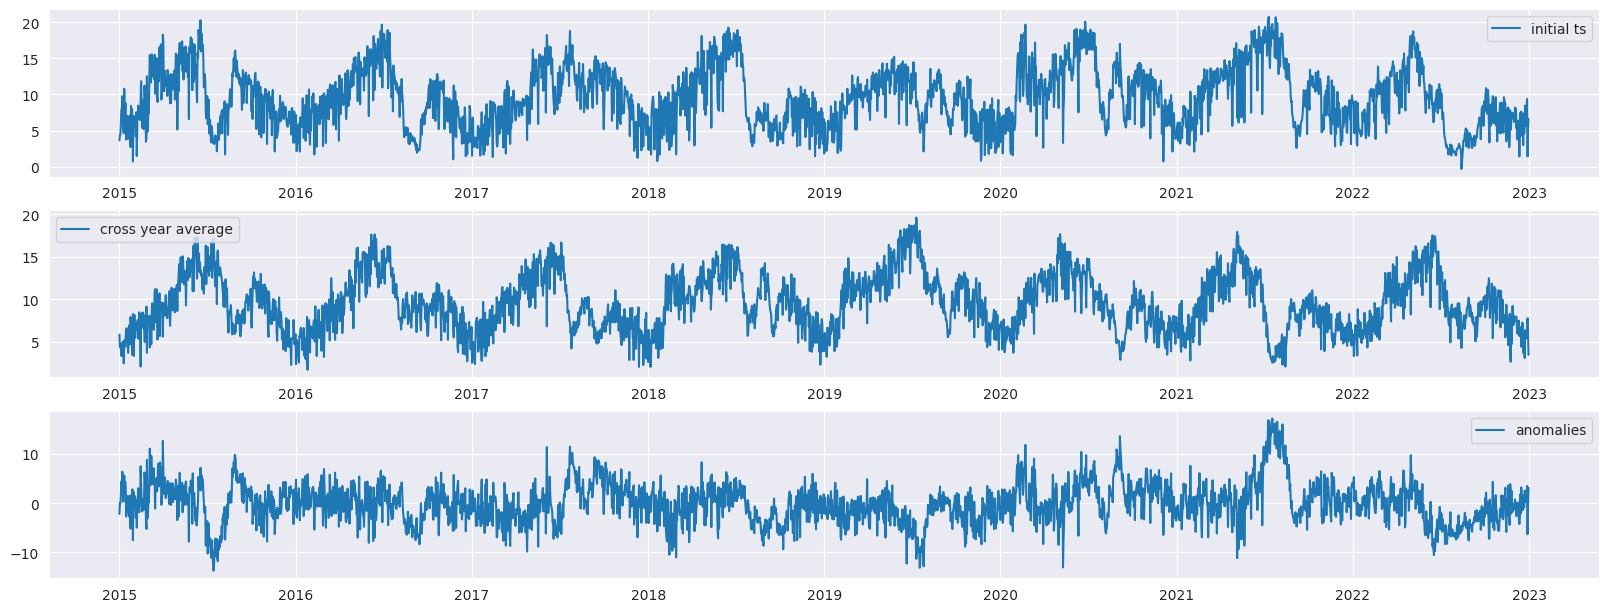

In [8]:
plt.figure(figsize=(20,10))

plt.subplot(411)
plt.plot(mydf['DateTime'], mydf['GPP'])
plt.legend(['initial ts'])

plt.subplot(412)
plt.plot(mydf['DateTime'], mydf['GPP_ann'])
plt.legend(['cross year average'])

# plt.subplot(413)
# plt.plot(mydf['DateTime'], mydf['GPP_cycle'])
# plt.legend(['day-and-night cycle'])

plt.subplot(413)
plt.plot(mydf['DateTime'], mydf['GPP_anomalies'])
plt.legend(['anomalies'])

plt.show()

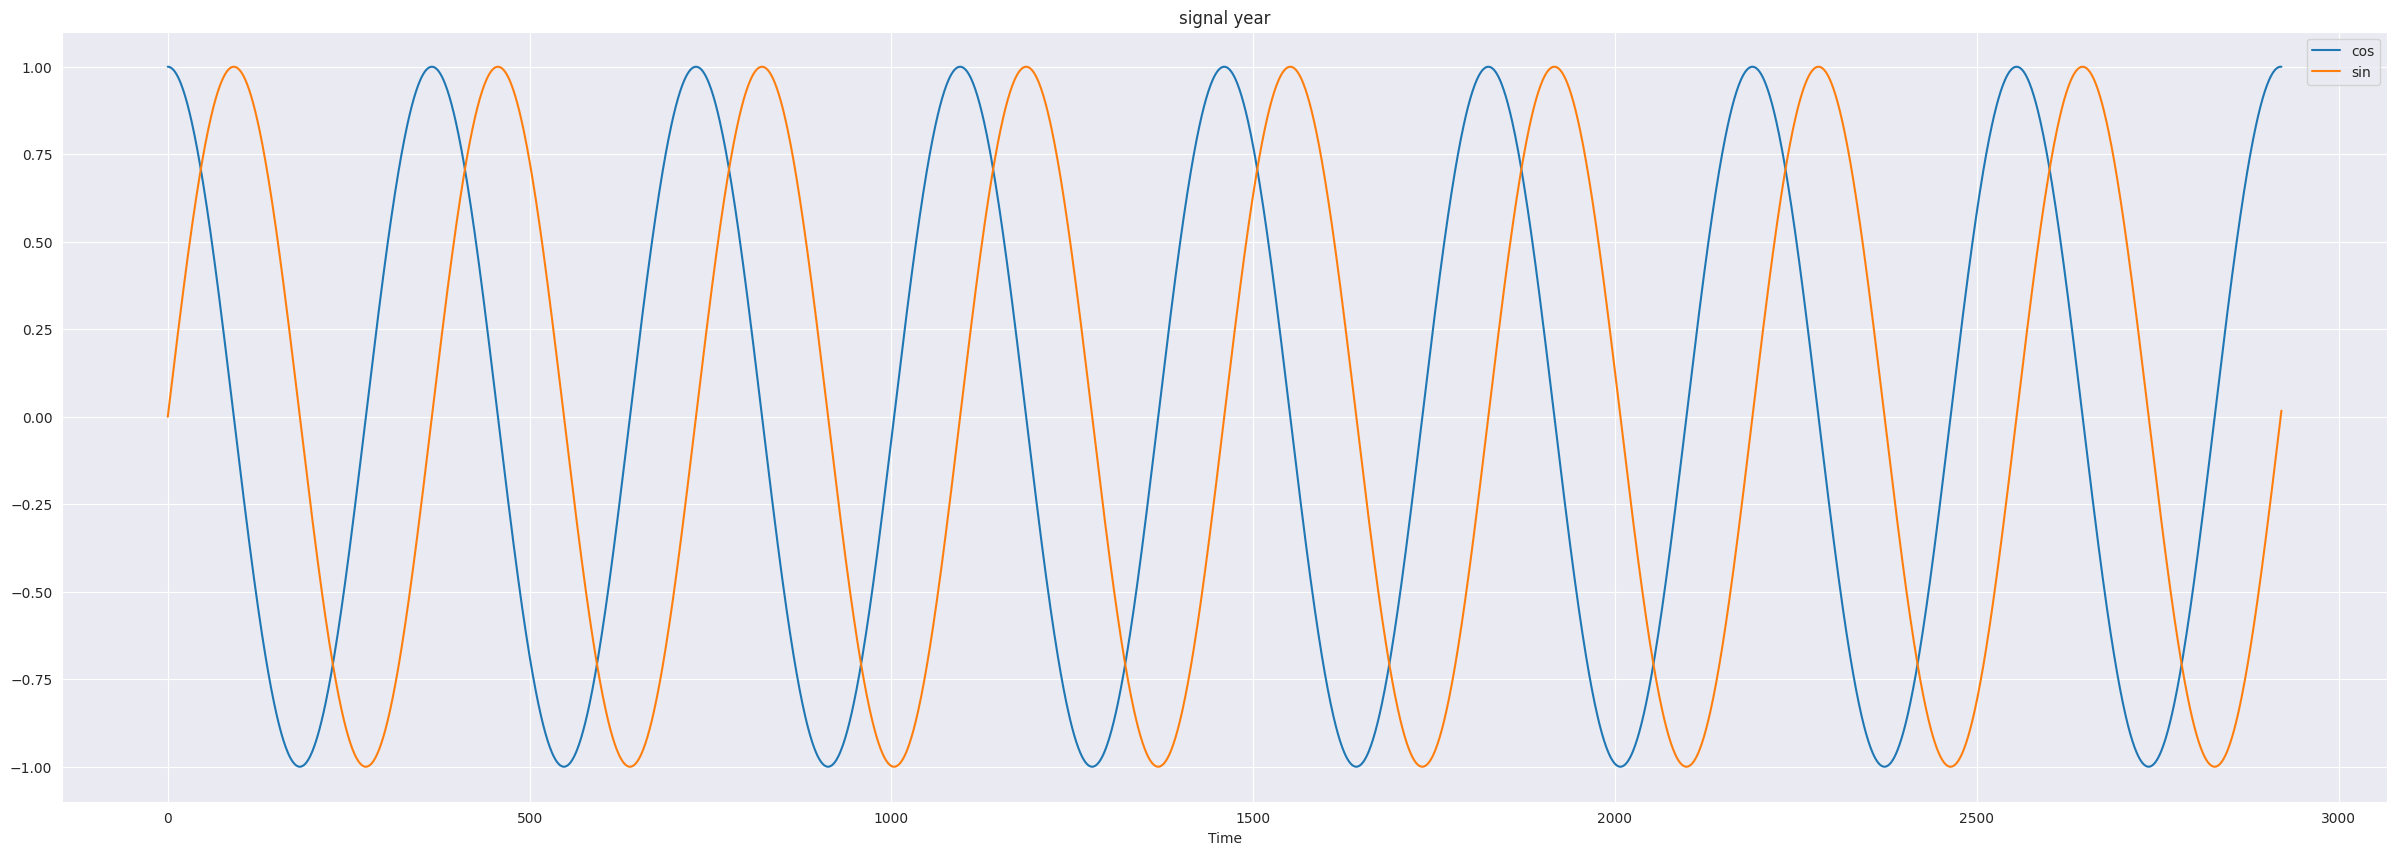

In [ ]:
plt.figure(figsize=(30,10))

plt.plot(mydf['cos year'], label='cos')
plt.plot(mydf['sin year'], label='sin')
plt.xlabel('Time')
plt.title('signal year')
plt.legend()
plt.show()

### Distribution de Delta GPP

In [ ]:
data = mydf.copy()
data.loc[0,'delta_gpp'] = 0
for i in range(1,len(data)):
  data.loc[i, 'delta_gpp'] = data.loc[i,'GPP']-data.loc[i-1,'GPP'] # gpp(t)-gpp(t-1)

In [ ]:
data['delta_gpp']

0       0.000000
1       0.762273
2       0.030135
3       1.804657
4       1.553452
          ...   
2917    1.934043
2918    1.775388
2919   -7.940892
2920    3.810038
2921    1.356128
Name: delta_gpp, Length: 2922, dtype: float64

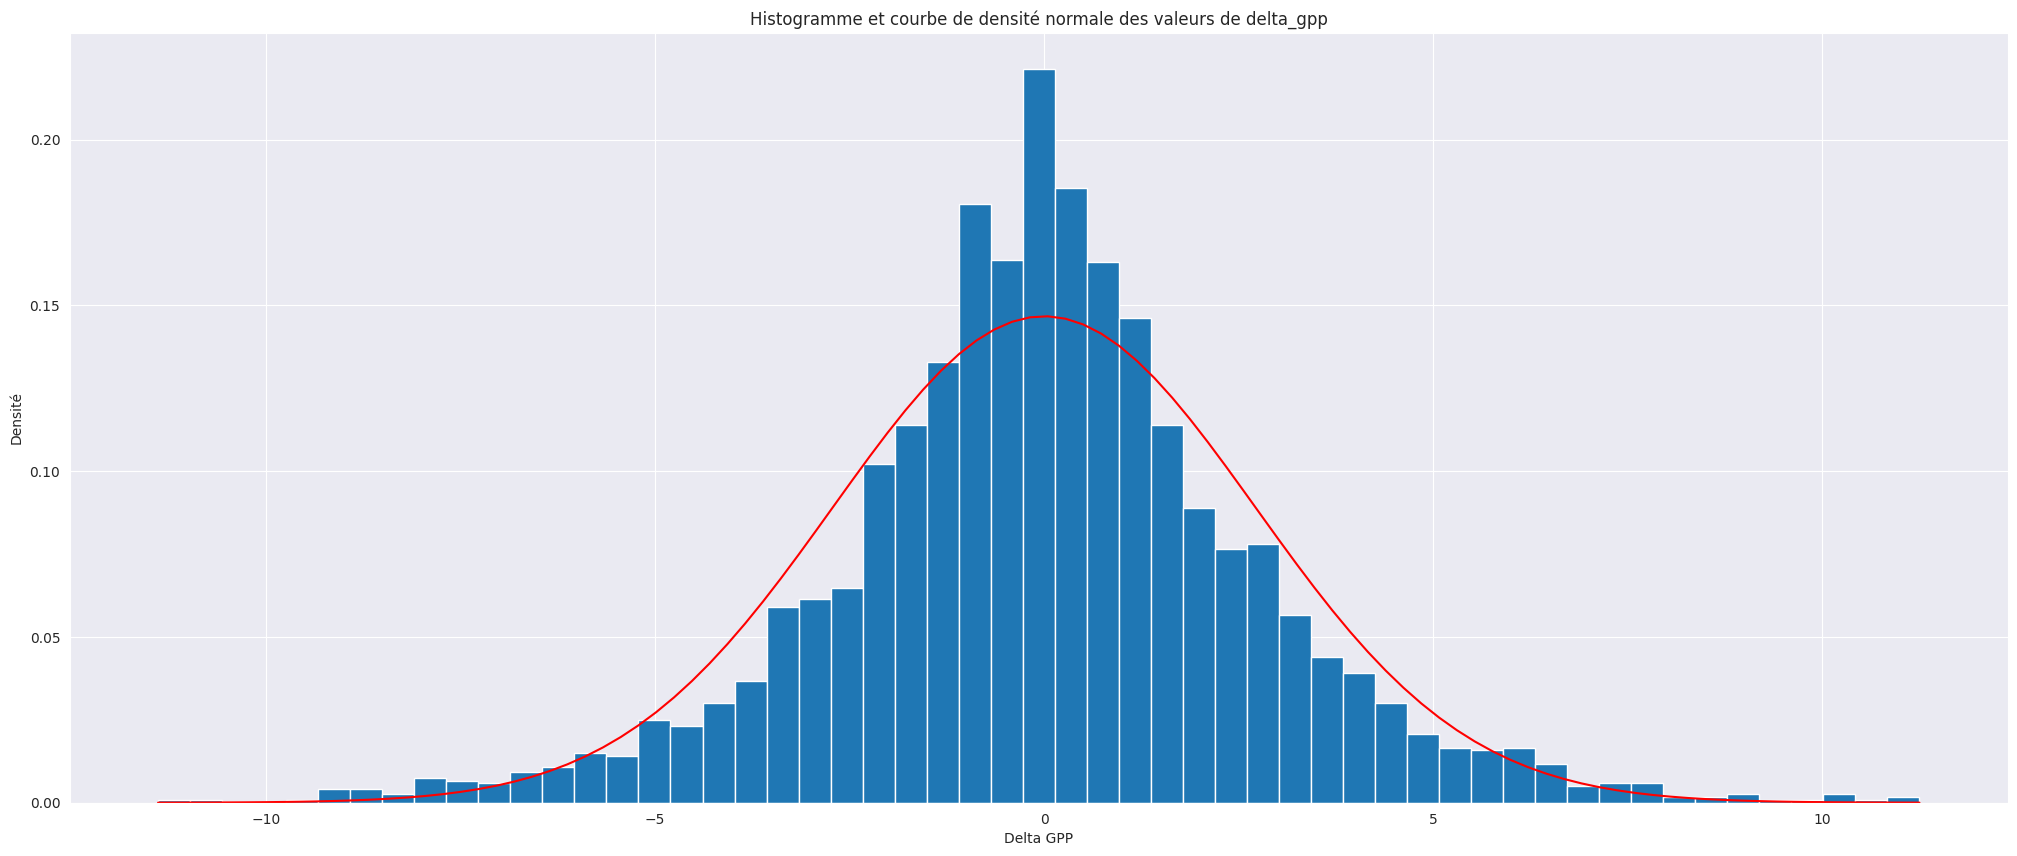

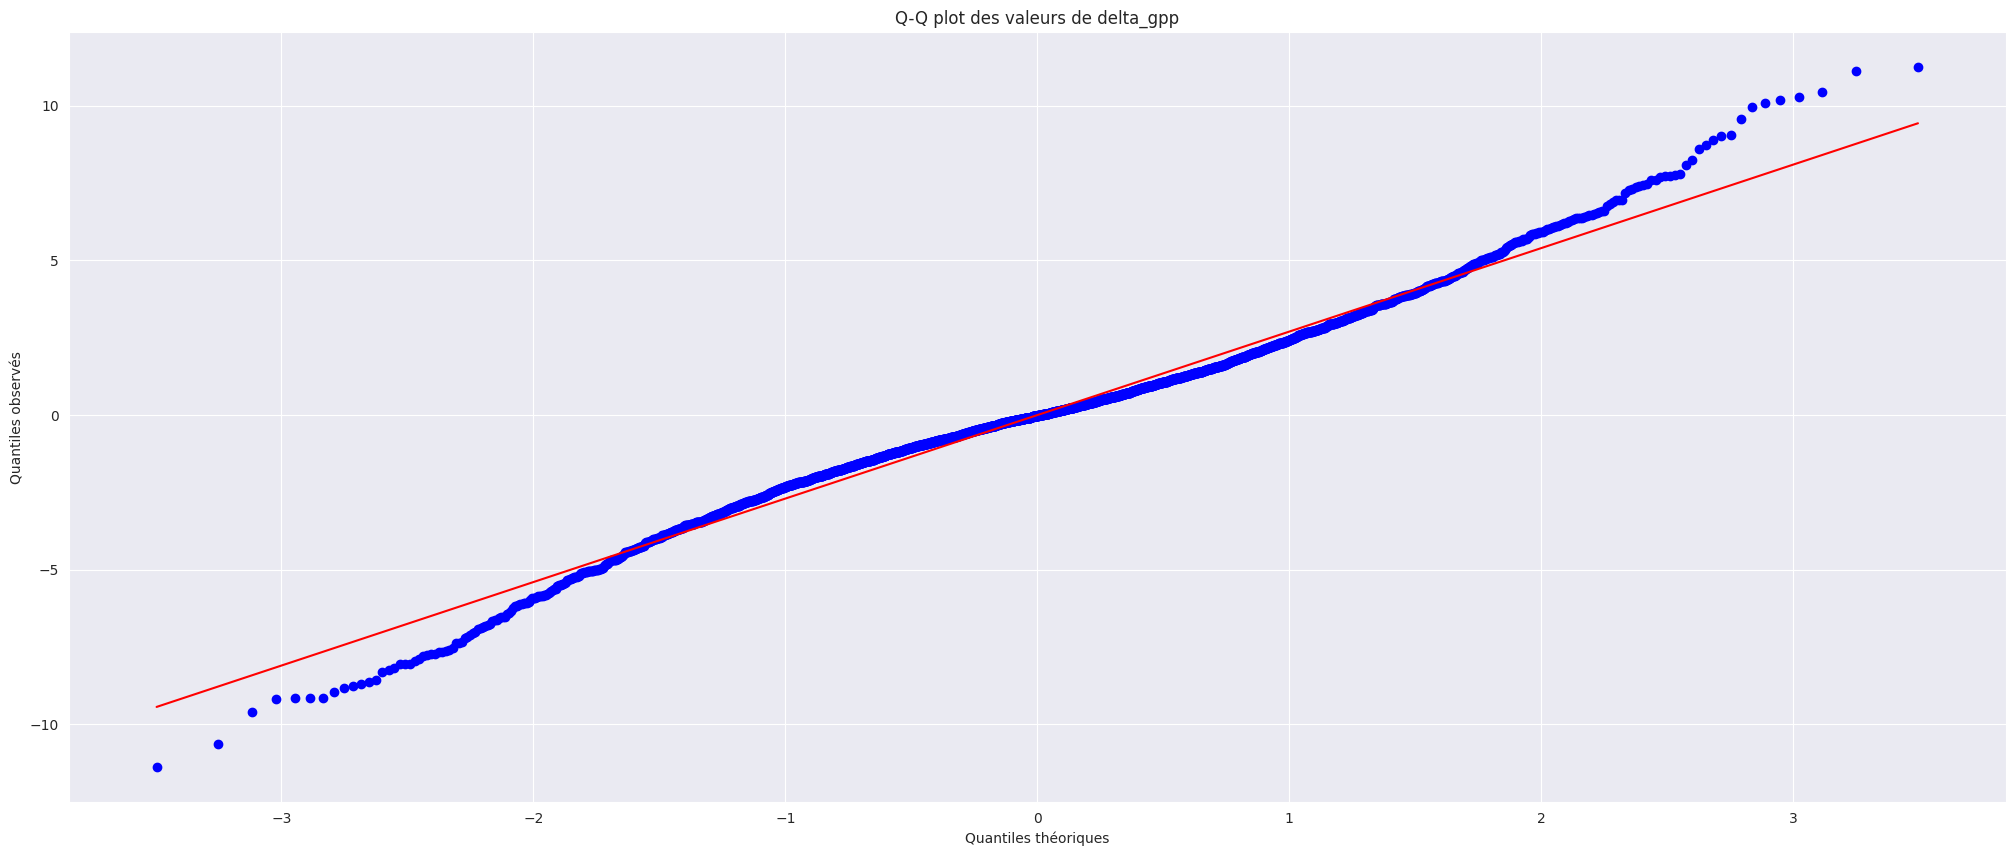

In [ ]:
import scipy.stats as stats
from scipy.stats import norm

# l'histogramme des valeurs de 'delta_gpp'
plt.figure(figsize=(25,10))
plt.hist(data['delta_gpp'], bins='auto', density=True)

# courbe de densité normale
mean_delta_gpp = np.mean(data['delta_gpp']) # moy
std_delta_gpp = np.std(data['delta_gpp'])   # écart type
x = np.linspace(min(data['delta_gpp']), max(data['delta_gpp']), 100)
plt.plot(x, norm.pdf(x, loc=mean_delta_gpp, scale=std_delta_gpp), color='red')

plt.xlabel('Delta GPP')
plt.ylabel('Densité')
plt.title('Histogramme et courbe de densité normale des valeurs de delta_gpp')
plt.show()


# tracer le graphique quantile-quantile (Q-Q plot) des valeurs de 'delta_gpp'
plt.figure(figsize=(25,10))
stats.probplot(data['delta_gpp'], dist='norm', plot=plt)
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles observés')
plt.title('Q-Q plot des valeurs de delta_gpp')
plt.show()